In [9]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Анализ множества объектов

In [10]:
names = [
       "word_freq_make",
       "word_freq_address",
       "word_freq_all",
       "word_freq_3d",
       "word_freq_our",
       "word_freq_over",
       "word_freq_remove",
       "word_freq_internet",
       "word_freq_order",
       "word_freq_mail",
       "word_freq_receive",
       "word_freq_will",
       "word_freq_people",
       "word_freq_report",
       "word_freq_addresses",
       "word_freq_free",
       "word_freq_business",
       "word_freq_email",
       "word_freq_you",
       "word_freq_credit",
       "word_freq_your",
       "word_freq_font",
       "word_freq_000",
       "word_freq_money",
       "word_freq_hp",
       "word_freq_hpl",
       "word_freq_george",
       "word_freq_650",
       "word_freq_lab",
       "word_freq_labs",
       "word_freq_telnet",
       "word_freq_857",
       "word_freq_data",
       "word_freq_415",
       "word_freq_85",
       "word_freq_technology",
       "word_freq_1999",
       "word_freq_parts",
       "word_freq_pm",
       "word_freq_direct",
       "word_freq_cs",
       "word_freq_meeting",
       "word_freq_original",
       "word_freq_project",
       "word_freq_re",
       "word_freq_edu",
       "word_freq_table",
       "word_freq_conference",
       "char_freq_;",
       "char_freq_(",
       "char_freq_[",
       "char_freq_!",
       "char_freq_$",
       "char_freq_#",
       "capital_run_length_average",
       "capital_run_length_longest",
       "capital_run_length_total",
       "is_spam"
]

dataset = pd.read_csv('https://raw.githubusercontent.com/dkofanov/ml/master/task1/data/spambase.data', 
                      header=None, 
                      names=names)

                            
dataset.sample(5, random_state=0)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
991,0.1,0.20,1.01,0.0,0.80,0.80,0.5,0.00,0.8,0.10,...,0.000,0.111,0.000,0.491,0.158,0.015,8.550,669,1351,1
2565,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.000,0.552,0.000,0.000,0.000,0.000,1.000,1,4,0
1906,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.666,4,15,0
1471,0.0,0.82,0.32,0.0,1.14,0.32,0.0,0.16,0.0,0.65,...,0.000,0.000,0.000,0.000,0.290,0.029,2.257,13,158,1
1813,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,0


### Множество объектов
В данной задачи множество объектов описывается $n=57$ признаками, характеризующими каждое e-mail письмо:
* idx 1-48 - частота конкретных слов в письме (`"money"`, `"people"`, `"free"`, etc.);
* idx 49-54 - частота некоторых символов в сообщении (`';'`, `'('`, `'$'`, etc.);
* idx 55-57 - числа, характеризующие использование заглавных букв (`среднее число подряд идущих заглавных`, `длиннейшая последовательность из заглавных букв`, `общее число заглавных букв`).

Нормировке подлежат признаки 55-57, из-за их "количественной" природы; применим к ним z-нормировку: 

In [11]:
spam_n = 0
for i in range(len(dataset)):
    if dataset["is_spam"][i] == 1:
        spam_n += 1

dataset.loc[:, "capital_run_length_average"] = zscore(dataset["capital_run_length_average"])
dataset.loc[:, "capital_run_length_longest"] = zscore(dataset["capital_run_length_longest"])
dataset.loc[:, "capital_run_length_total"]   = zscore(dataset["capital_run_length_total"])


print('Размер выборки составляет l  = {} объектов'.format(len(dataset)))
print('     из них спам-объектов ls = {}.'.format(spam_n))
dataset

Размер выборки составляет l  = 4601 объектов
     из них спам-объектов ls = 1813.


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,-0.045247,0.045298,-0.008724,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,-0.002443,0.250563,1.228324,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,0.145921,2.221106,3.258733,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,-0.052150,-0.062466,-0.152222,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,-0.052150,-0.062466,-0.152222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,-0.127640,-0.252336,-0.322110,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,-0.114623,-0.247205,-0.444165,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,-0.119382,-0.236941,-0.272628,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,-0.127483,-0.242073,-0.338604,0


### Визуализация данных
Выберем некоторые "яркие" признаки ("word_freq_money", "word_freq_receive", "word_freq_free", "char_freq_$", "char_freq_!", "capital_run_length_average", 
"capital_run_length_longest", "capital_run_length_total", "is_spam") и попробуем отобразить их.

К сожалению, классифицировать объекты таким образом не удаётся:

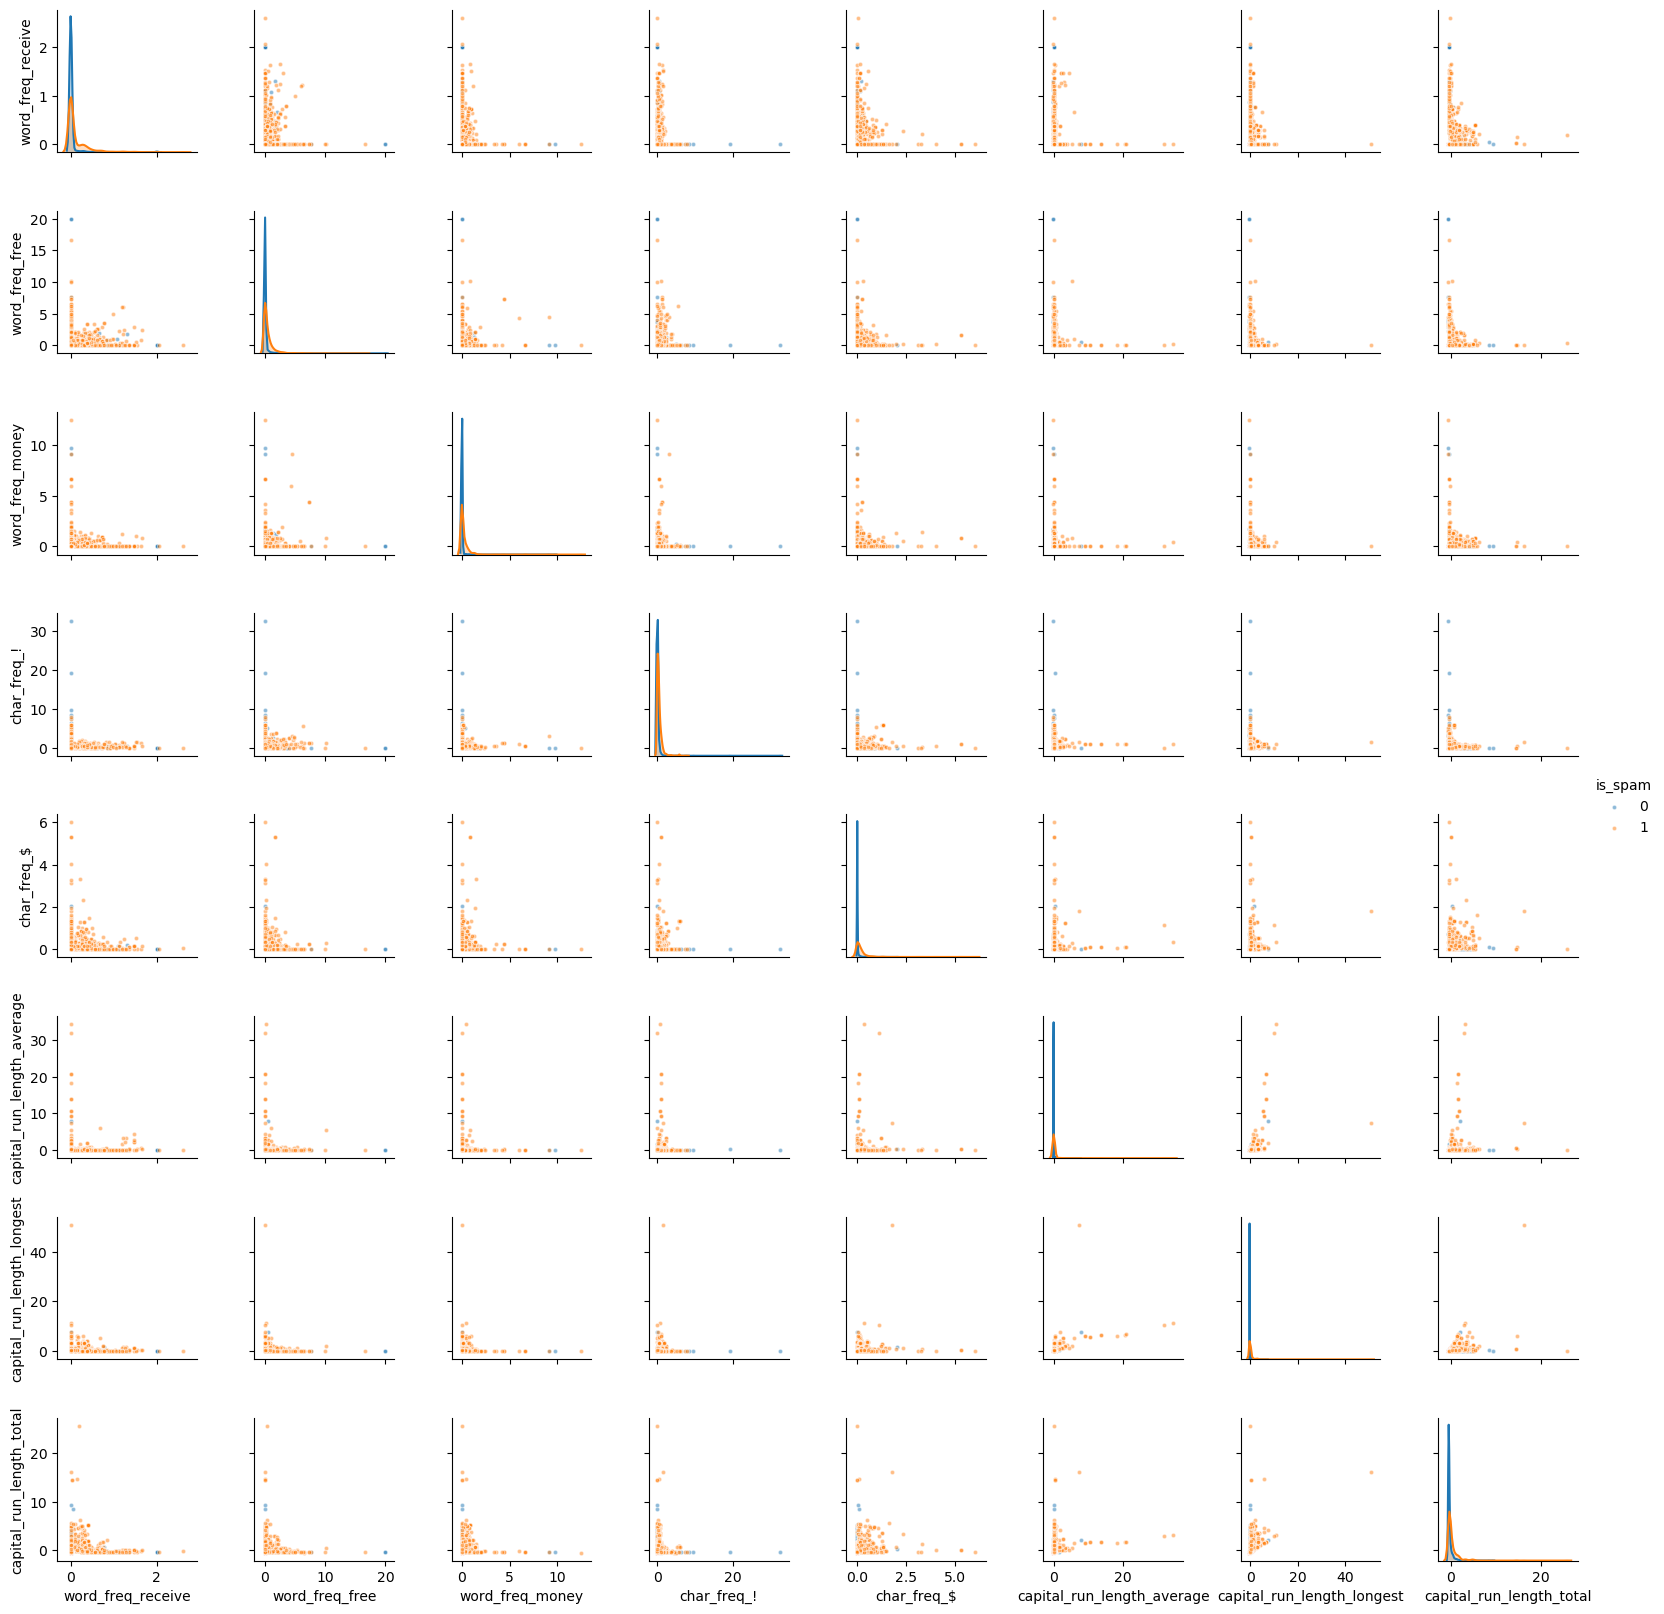

In [12]:
df = dataset.loc[:, dataset.columns.isin(["word_freq_money", "word_freq_receive", "word_freq_free", "char_freq_$", "char_freq_!", "capital_run_length_average",
       "capital_run_length_longest",
       "capital_run_length_total", "is_spam"])]
sns.pairplot(df.sample(len(dataset), random_state=1231245), hue="is_spam", height=2, plot_kws={"alpha":.5, "s": 10})
plt.show()

### Перцептрон

Была использована l1-регуляризация с множителем = 0.0005. Данный тип регуляризации выбран так как он допускает разреженные коэффициенты (позволяя отсеить фичи, слабо характеризующие спам-письма). Выбор множителя обсуловлен оптимизацией разницы prediction score на тренировочной и контрольной выборках (см. график ниже).

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

X = dataset.iloc[:, dataset.columns != 'is_spam'].values
y = dataset.iloc[:, dataset.columns == 'is_spam'].values.reshape(-1)
X.shape, y.shape
# hold-out validation


N_TRAINS = 100
STEP = 0.005

ALPHA = 0.0005
def TestPerceptron(X_tr, y_tr, X_ctrl, y_ctrl, is_print_coef=0):
    perceptron = Perceptron(penalty = "l1", alpha=ALPHA, random_state=0, max_iter=5000).fit(X_tr, y_tr)
    train_score = perceptron.score(X_tr, y_tr)
    ctrl_score = perceptron.score(X_ctrl, y_ctrl)
    if is_print_coef:
        for i in range(len(dataset.columns) - 1):
            print(dataset.columns[i], perceptron.coef_[0][i])
    return train_score, ctrl_score


def TestKNN(K, X_tr, y_tr, X_ctrl, y_ctrl, is_print_coef=0):
    knn = KNeighborsClassifier(n_neighbors=K).fit(X_tr, y_tr)
    train_score = knn.score(X_tr, y_tr)
    ctrl_score = knn.score(X_ctrl, y_ctrl)
    if is_print_coef:
        for i in range(len(dataset.columns) - 1):
            print(dataset.columns[i], knn.coef_[0][i])
    return train_score, ctrl_score

trainset_size = np.arange(0, N_TRAINS * STEP, STEP)
test_scores_perc = list()
ctrl_scores_perc = list()
test_scores_knn = list()
ctrl_scores_knn = list()

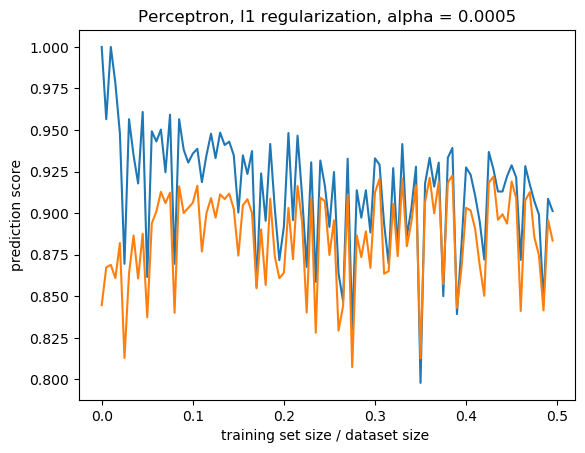

In [14]:
test_scores_perc.clear()
ctrl_scores_perc.clear()
for i in range(1, N_TRAINS + 1):
    X_train, X_ctrl, y_train, y_ctrl = train_test_split(X, y, test_size=(1 - STEP * i), random_state=0)
    tr_perc, sc_perc = TestPerceptron(X_train, y_train, X_ctrl, y_ctrl)
    test_scores_perc.append(tr_perc)
    ctrl_scores_perc.append(sc_perc)

plt.plot(trainset_size, test_scores_perc, label="test")
plt.plot(trainset_size, ctrl_scores_perc, label="control")
plt.title("Perceptron, l1 regularization, alpha = {}".format(ALPHA))
plt.ylabel("prediction score")
plt.xlabel("training set size / dataset size ")
plt.show()

### K-nearest neighbors
В качестве гиперпараметров выступает количество соседей, учавствующих в "голосовании". Зависимость от гиперпараметра приведена ниже на графиках.

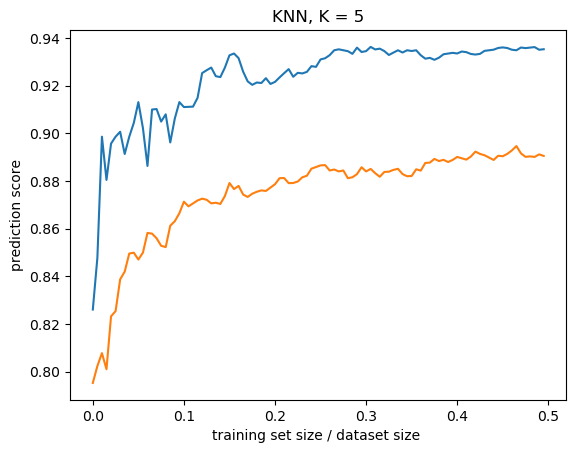

In [15]:
test_scores_knn.clear()
ctrl_scores_knn.clear()

for i in range(1, N_TRAINS + 1):
    X_train, X_ctrl, y_train, y_ctrl = train_test_split(X, y, test_size=(1 - STEP * i), random_state=0)
    K = 5
    tr_knn, sc_knn = TestKNN(K, X_train, y_train, X_ctrl, y_ctrl)
    test_scores_knn.append(tr_knn)
    ctrl_scores_knn.append(sc_knn)

plt.plot(trainset_size, test_scores_knn, label="test")
plt.plot(trainset_size, ctrl_scores_knn, label="control")
plt.title("KNN, K = {}".format(K))
plt.ylabel("prediction score")
plt.xlabel("training set size / dataset size ")
plt.show()

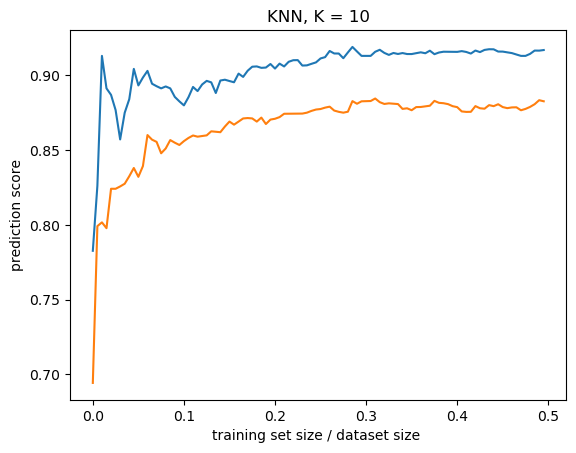

In [8]:
test_scores_knn.clear()
ctrl_scores_knn.clear()

for i in range(1, N_TRAINS + 1):
    X_train, X_ctrl, y_train, y_ctrl = train_test_split(X, y, test_size=(1 - STEP * i), random_state=0)
    K = 10
    tr_knn, sc_knn = TestKNN(K, X_train, y_train, X_ctrl, y_ctrl)
    test_scores_knn.append(tr_knn)
    ctrl_scores_knn.append(sc_knn)

plt.plot(trainset_size, test_scores_knn, label="test")
plt.plot(trainset_size, ctrl_scores_knn, label="control")
plt.title("KNN, K = {}".format(K))
plt.ylabel("prediction score")
plt.xlabel("training set size / dataset size ")
plt.show()

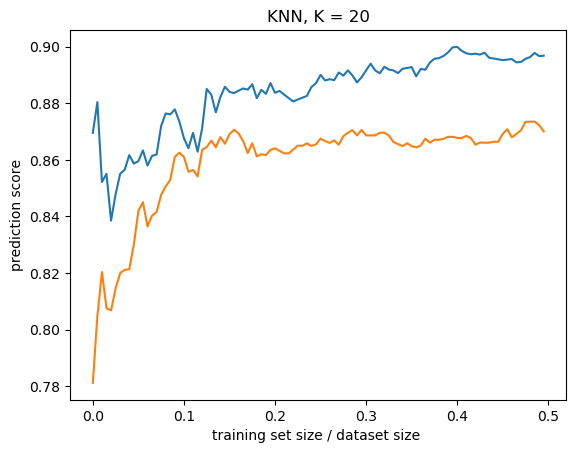

In [16]:
test_scores_knn.clear()
ctrl_scores_knn.clear()

for i in range(3, N_TRAINS + 3):
    X_train, X_ctrl, y_train, y_ctrl = train_test_split(X, y, test_size=(1 - STEP * i), random_state=0)
    K = 20
    tr_knn, sc_knn = TestKNN(K, X_train, y_train, X_ctrl, y_ctrl)
    test_scores_knn.append(tr_knn)
    ctrl_scores_knn.append(sc_knn)

plt.plot(trainset_size, test_scores_knn, label="test")
plt.plot(trainset_size, ctrl_scores_knn, label="control")
plt.title("KNN, K = {}".format(K))
plt.ylabel("prediction score")
plt.xlabel("training set size / dataset size ")
plt.show()

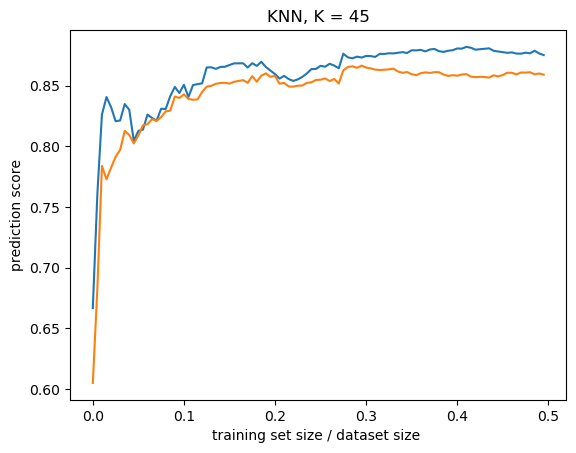

In [17]:
test_scores_knn.clear()
ctrl_scores_knn.clear()

for i in range(3, N_TRAINS + 3):
    X_train, X_ctrl, y_train, y_ctrl = train_test_split(X, y, test_size=(1 - STEP * i), random_state=0)
    K = 45
    tr_knn, sc_knn = TestKNN(K, X_train, y_train, X_ctrl, y_ctrl)
    test_scores_knn.append(tr_knn)
    ctrl_scores_knn.append(sc_knn)

plt.plot(trainset_size, test_scores_knn, label="test")
plt.plot(trainset_size, ctrl_scores_knn, label="control")
plt.title("KNN, K = {}".format(K))
plt.ylabel("prediction score")
plt.xlabel("training set size / dataset size ")
plt.show()

## Вывод
Были исследованы некоторые методы машинного обучения (perceptron, K-nearest-neighbours).
Методы исследованы на зависимость от размера обучающей выборки, получены зависимости от гиперпараметров. 